# Learning curves 
Jan2023 \
author: Inês Laranjeira

In [1]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# --Get my functions


from one.api import ONE
#one = ONE(base_url='https://openalyx.internationalbrainlab.org')  # public database
one = ONE(base_url='https://alyx.internationalbrainlab.org')


In [2]:
functions_path = "../DATA/"
os.chdir(functions_path)

trials = pickle.load(open("trials_private_one", "rb"))


In [4]:
# TODO: this should be a function (prepro)


""" Performance """
# Some preprocessing
trials.loc[trials['contrastLeft']==np.nan, 'contrastLeft'] = 0
trials.loc[trials['contrastRight']==np.nan, 'contrastRight'] = 0
trials['signed_contrast'] = - trials['contrastLeft'] + trials['contrastRight']
trials['contrast'] = trials['contrastLeft'] + trials['contrastRight']
trials['correct_easy'] = trials['feedbackType']
trials.loc[trials['correct_easy']==-1, 'correct_easy'] = 0

trials.loc[trials['contrast']<.5, 'correct_easy'] = np.nan


""" Response/ reaction times """
trials['response'] = trials['response_times'] - trials['stimOn_times']
trials['reaction'] = trials['firstMovement_times'] - trials['stimOn_times']

#TODO : trials['days_to_trained'] = trials['training_time']

In [7]:
grouped_trials = pd.DataFrame(trials.groupby(['subject_nickname', 
                                                              'training_day'])['correct_easy'].mean())
grouped_trials = grouped_trials.reset_index(level=[0, 1])

<AxesSubplot: xlabel='training_day', ylabel='correct_easy'>

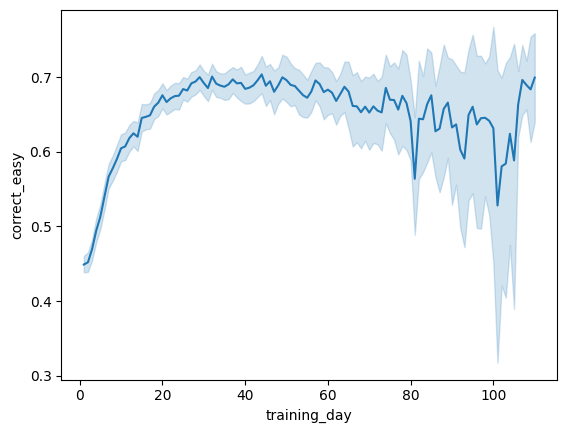

In [8]:
sns.lineplot(x='training_day', y='correct_easy', data=grouped_trials)

In [9]:
trials.keys()

Index(['goCueTrigger_times', 'stimOnTrigger_times', 'repNum', 'goCue_times',
       'response_times', 'choice', 'stimOn_times', 'contrastLeft',
       'contrastRight', 'feedback_times', 'feedbackType', 'rewardVolume',
       'probabilityLeft', 'firstMovement_times', 'intervals_0', 'intervals_1',
       'trial_id', 'subject_nickname', 'session_date', 'session_number',
       'task_protocol', 'session_uuid', 'included', 'training_day',
       'signed_contrast', 'contrast', 'correct_easy', 'response', 'reaction'],
      dtype='object')

In [11]:
trials.task_protocol.unique()[0:50]

array(['_iblrig_tasks_trainingChoiceWorld',
       '_iblrig_tasks_trainingChoiceWorld7.0.1',
       '_iblrig_tasks_trainingChoiceWorld7.0.4',
       '_iblrig_tasks_trainingChoiceWorld6.6.2',
       '_iblrig_NPH_tasks_trainingChoiceWorld_May20227.0.4',
       '_iblrig_tasks_trainingChoiceWorld7.0.0',
       '_iblrig_tasks_trainingChoiceWorld6.5.3',
       '_iblrig_tasks_trainingChoiceWorld6.6.1',
       '_iblrig_tasks_trainingChoiceWorld6.4.2',
       '_iblrig_tasks_trainingChoiceWorld6.5.0',
       '_iblrig_NPH_tasks_trainingChoiceWorld2',
       '_iblrig_tasks_trainingChoiceWorld6.5.2',
       '_iblrig_tasks_trainingChoiceWorld6.5.1',
       '_iblrig_tasks_trainingChoiceWorld6.4.1',
       '_iblrig_tasks_trainingChoiceWorld6.4.0',
       '_iblrig_tasks_trainingChoiceWorld6.2.5',
       '_iblrig_tasks_trainingChoiceWorld6.3.1',
       '_iblrig_tasks_trainingChoiceWorld6.1.3',
       '_iblrig_tasks_trainingChoiceWorld6.2.4',
       '_iblrig_tasks_trainingChoiceWorld6.3.0',
       '_iblr

## Get data

In [40]:
""" 
GET LEARNING DATA
"""
trials = pickle.load(open("learning_private_one", "rb"))
#trials = pickle.load(open("training_time_private_one", "rb"))


In [4]:

eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'

wheel = one.load_object(eid, 'wheel', collection='alf')
wheelMoves = one.load_object(eid, 'wheelMoves', collection='alf')

/Users/ineslaranjeira/Downloads/FlatIron/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 8.08M/8.08M [00:03<00:00, 2.61MB/s]
/Users/ineslaranjeira/Downloads/FlatIron/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_wheel.position.npy: 100%|██████████| 8.08M/8.08M [00:05<00:00, 1.60MB/s]
/Users/ineslaranjeira/Downloads/FlatIron/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_wheelMoves.peakAmplitude.npy: 100%|██████████| 13.4k/13.4k [00:00<00:00, 40.6kB/s]
/Users/ineslaranjeira/Downloads/FlatIron/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_wheelMoves.intervals.npy: 100%|██████████| 26.6k/26.6k [00:00<00:00, 72.0kB/s]


KeyError: 1

TypeError: scatter() missing 1 required positional argument: 'y'

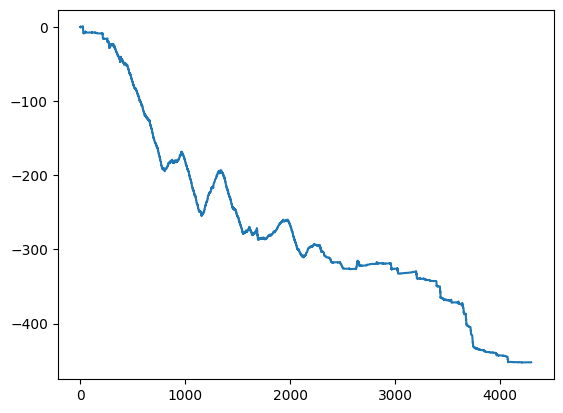

In [16]:
plt.plot(wheel.timestamps, wheel.position)


In [15]:
wheelMoves.intervals.T[0]

array([3.24973500e-02, 2.12249735e+00, 5.50649735e+00, ...,
       4.27439350e+03, 4.28801150e+03, 4.29496650e+03])